在涵盖趋势的第二个教程中，我们禁用了季节性。让我们从每年的季节性开始，再次逐步启用季节性。我们试一试，然后看看它对模型有什么影响。为了简单起见，我们将保持趋势线性，没有变化点。

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# 导入依赖
import warnings

warnings.filterwarnings("ignore")

# Disable logging messages unless there is an error
set_log_level("ERROR")

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [3]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Load the dataset from the CSV file using pandas
df = pd.read_csv("/home/ann/opt/iNeuralProphet/data/tutorial01.csv")

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

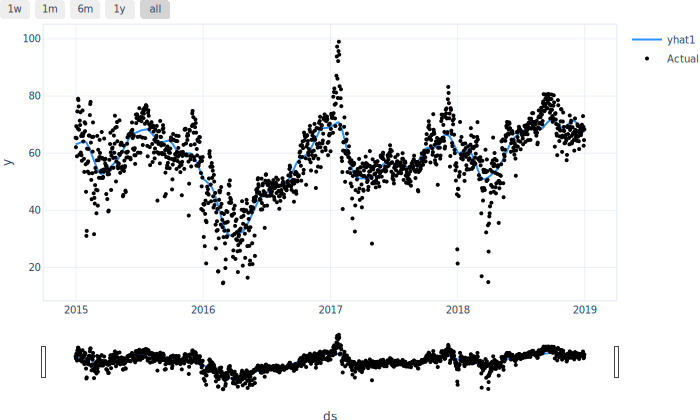

In [4]:
# Model and prediction with yearly seasonality
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=50,
    # Disable seasonality components, except yearly
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("plotly-static")
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

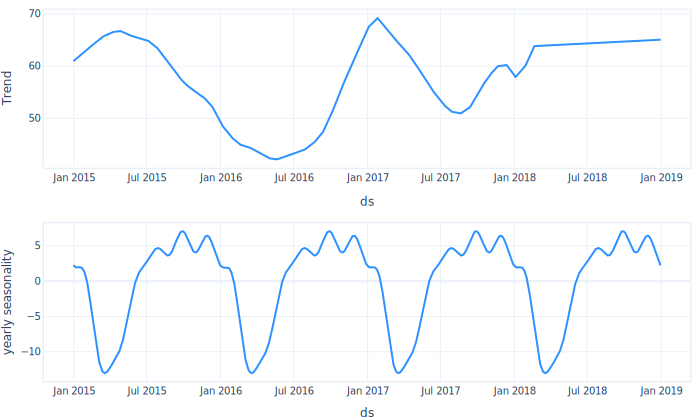

In [7]:
m.plot_components(forecast)

可视化季节性的另一种方法是使用 plot_paramters 绘制模型参数。在下面的可视化中，季节性的贡献仅显示一个时期，这里是一年的年度季节性。

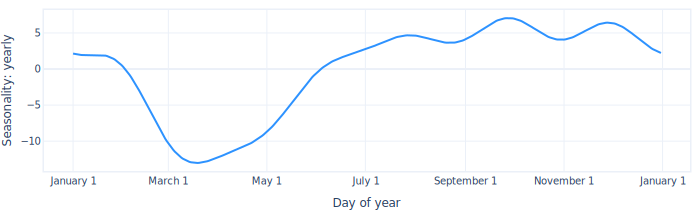

In [10]:
m.plot_parameters(components=["seasonality"])

继续手动启用 yearly 和 weekly daily 季节性，看看它的作用。

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

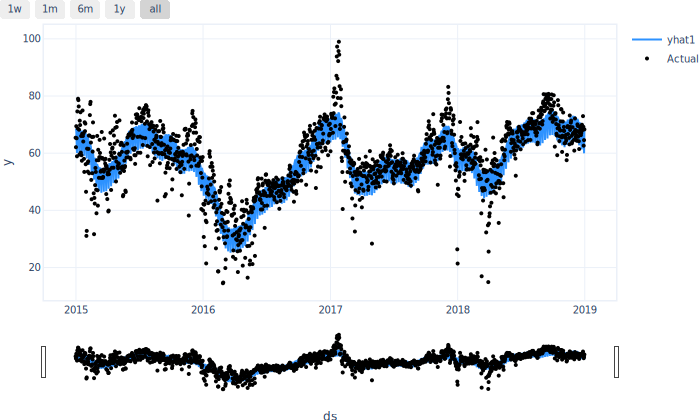

In [13]:
# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=50,
    # Enable all seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)
m.set_plotting_backend("plotly-static")
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

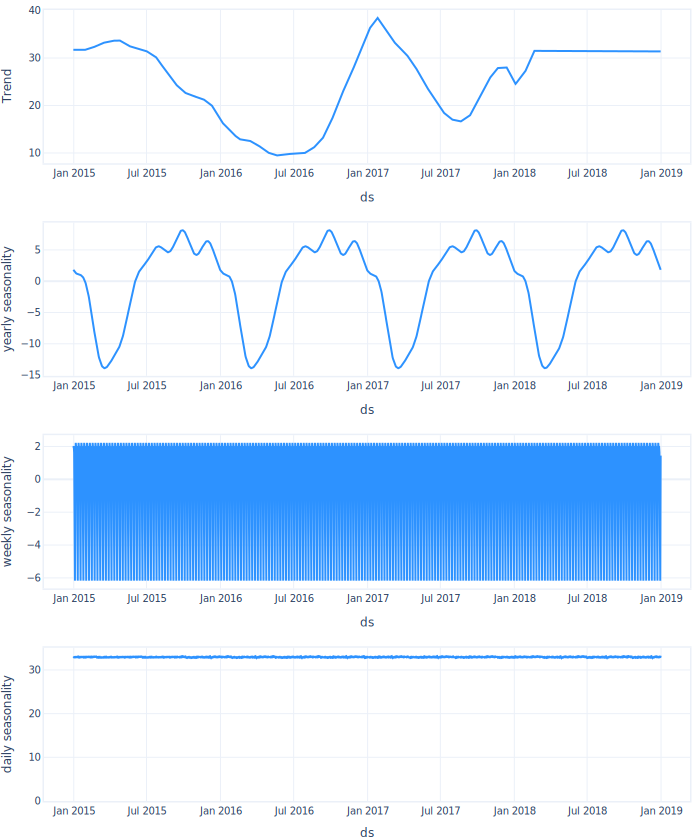

In [14]:
m.plot_components(forecast)

注意：每日季节性的模式是普通噪声，因为它没有日内数据可供拟合。这是傅里叶项方法的一个局限性：尽管我们能够拟合连续的季节性，但观测样本之间的周期可能会受到过度拟合的影响。这可以通过禁用季节性或将其设置为较少数量的傅里叶项来解决，从而降低其复杂性

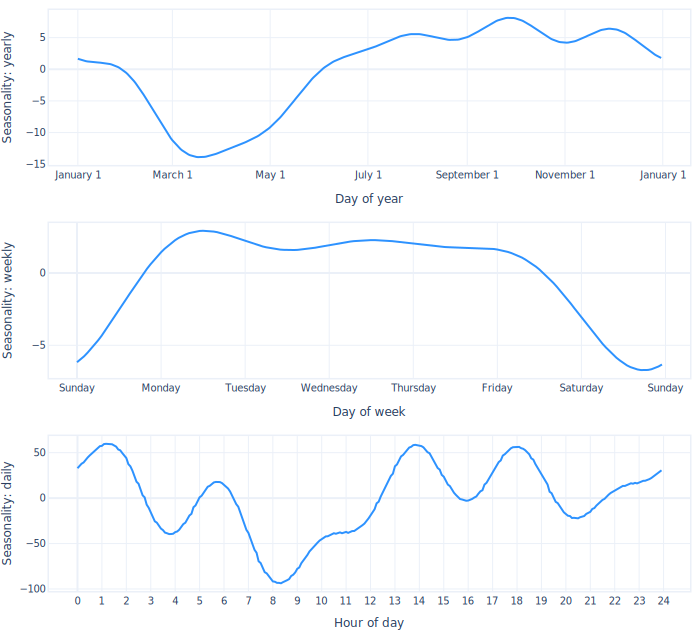

In [15]:
m.plot_parameters(components=["seasonality"])